##### Explanatory Data Analysis of:
## Microsoft, Apple, Amazon, Google, Netflix, and Facebook Workplace Reviews
___

#### Our work and workplace are a big part of our lives, and often they become a significant factor in our identities. In exploring our data set that is scraped off of popular job review site, glassdoor.com, we wanted to see how different things that matter to employees relate to each other. To do so, we only use reviews within the US, Canada, Irland, and the UK to have a reasonably similar workplace similarity yet diverse enough to consider as many people as possible. We could focus on comparing different regions of the world together for example how employees experience stack up against each other between the US and India. We could also separate employees based on their job titles into two general groups of Engineering and Production vs. Retail, and Administrative jobs. To answer our main question here, after some trial and error we realized it is best to consider all type of employees' ratings together.

#### We started with over 67k workplace reviews for Google, Amazon, Facebook, Apple, Netflix, and Microsoft. After some data wrangling and data filtering, we have a dataset of about 17000 reviews.

## Libraries, Settings and Loading the Dataset <a name="Libraries"></a>

In [1]:
# Fundamental libraries for scientific computing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ensures plots to be embedded inline.
%matplotlib inline
 
# Style and Base color used for seaborn plots.
bcolor = sns.color_palette()[0]
sns.set(style='ticks', palette='pastel')

# Suppress warnings from final output.
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)

#### Load up the dataset and first look at the data

In [2]:
df = pd.read_csv('./input/employee_reviews_clean.csv', index_col=0)
print('Number of rows (reviews) and columns:', df.shape)
df.sample()

Number of rows (reviews) and columns: (16987, 24)


,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,city,state,country,current_emp,anonymous,wordcount,detail_factor,review_days,time_factor,helful_factor,stars_score
company,,,,,,,,,,,,,,,,,,,,,,,,
microsoft,2008-06-11,Solution Specialist,"Microsoft remains a great place to work, but i...","Great Benefits, job security, contunually evol...",We are getting too large and bloated bureaucr...,Focus on balancing near term shareholder value...,4,5.0,NaN,4.0,4.0,3.0,0,Boston,MA,USA,True,False,144,0.576923,3970,0.0,1.0,0.75


In [3]:
rating_cols = ['overall_ratings', 'work_balance_stars', 'culture_values_stars',
              'carrer_opportunities_stars', 'comp_benefit_stars', 'senior_mangemnet_stars']

## Overall-Rating Distribution between Current and Past Employees

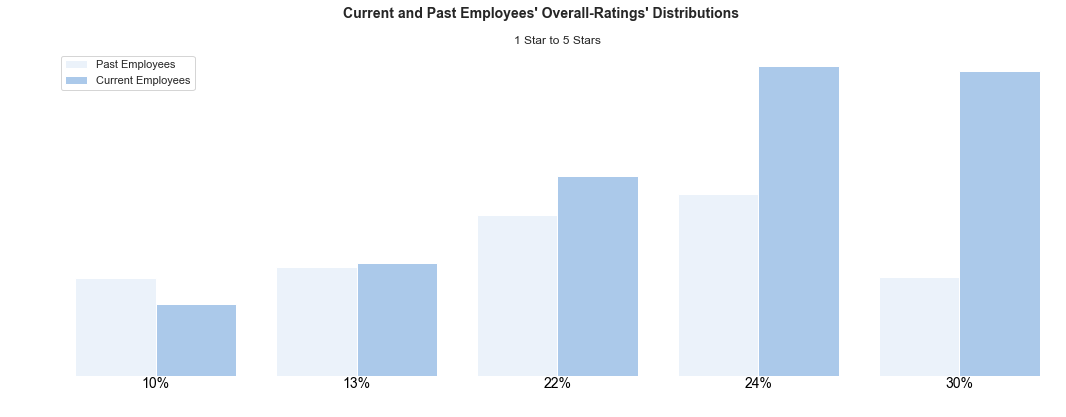

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))

fig.suptitle('Current and Past Employees\' Overall-Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[0]

sns.countplot(data=df, x='overall_ratings', hue='current_emp', color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Past Employees', 'Current Employees'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):
    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

### We can see unhappy past employees were more inclined to leave a low review than current employees. The plot clearly shows number of current over past employees ratio increases from 1-Star rating to 5-Stars. Happier current employees are leaving higher rating reviews maybe to show their appreciation and uphappier past employees are leaving lower rating reviews maybe to be finally heard!

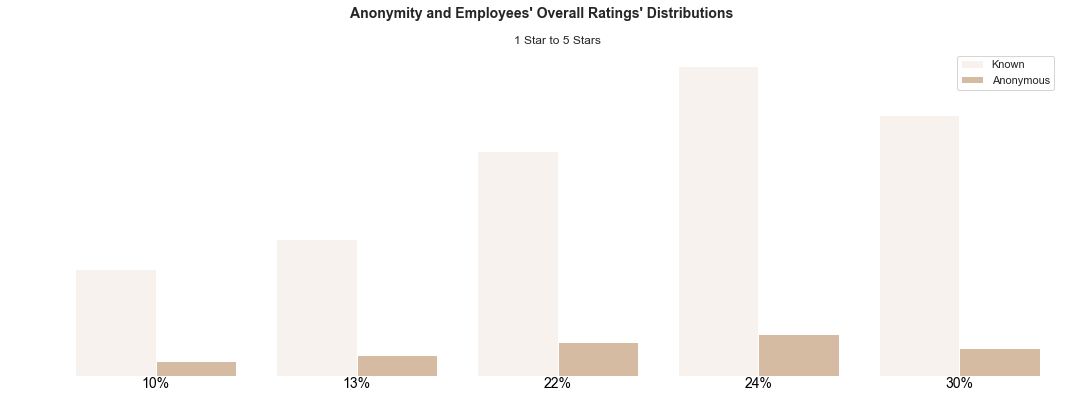

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))

fig.suptitle('Anonymity and Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[5]

sns.countplot(data=df, x='overall_ratings', hue='anonymous', color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Known', 'Anonymous'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

### Reviewers' Anonymity mostly leaves the rating distribution unaffected, and in all 5 levels of ratings, the significant number of reviewers are not anonymous.
___


### Similarities and differences of patterns between categories of ratings.

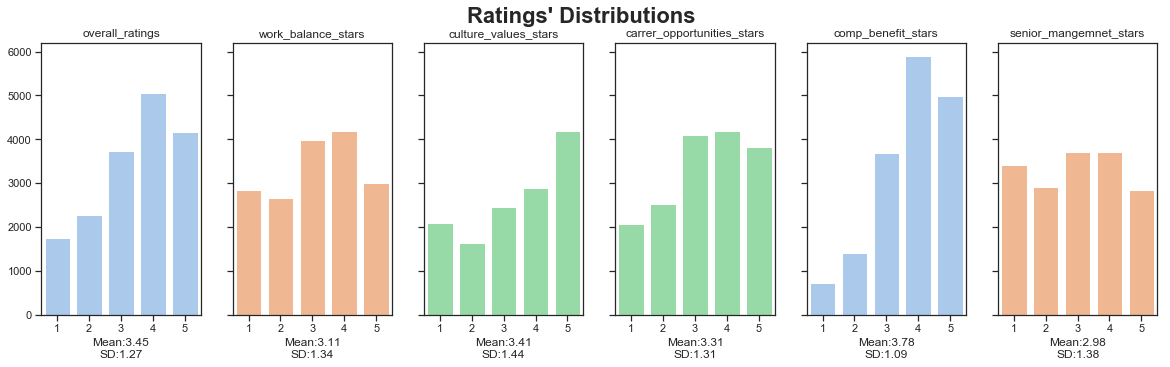

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Ratings\' Distributions', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    
    if col=='overall_ratings' or col=='comp_benefit_stars':
        color = sns.color_palette()[0]
    elif col=='work_balance_stars' or col=='senior_mangemnet_stars':
        color = sns.color_palette()[1]
    else:
        color = sns.color_palette()[2]
        
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks, hue=None)
    mean = '{:0.2f}'.format(df[col].mean())
    std = '{:0.2f}'.format(df[col].std())
    ax.set(title=ax.get_xlabel(), xlabel=f'Mean:{mean}\nSD:{std}', ylabel='')

#### The Overall-Stars distribution (pattern)  is very similar to the Compensation-Benefit-Stars distribution. The 2nd pair of very similar patterns are for Work-Life-Balance and Management ratings. The employees and senior management relationship shows it is the most troubling area. This goes hand in had with work-life balance with very similar distribution pattern. One main insight to take home here is the better the relationship between teams and their management the work feels more like life or time spent in worthy way.

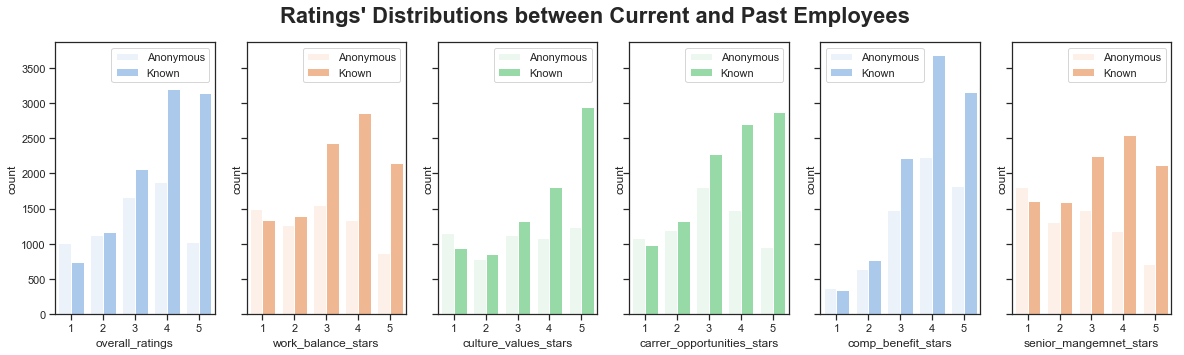

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Ratings\' Distributions between Current and Past Employees', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    
    if col=='overall_ratings' or col=='comp_benefit_stars':
        color = sns.color_palette()[0]
    elif col=='work_balance_stars' or col=='senior_mangemnet_stars':
        color = sns.color_palette()[1]
    else:
        color = sns.color_palette()[2]
        
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks, hue='current_emp')
    mean = '{:0.2f}'.format(df[col].mean())
    std = '{:0.2f}'.format(df[col].std())
    ax.legend(['Anonymous', 'Known'])

#### We can see when it comes to 1-star reviews, i.e. employess with most negative experaince, in almost all rating categories number of past employees is greater than current employees. In other words, upset past employees are more vocal than those still working at the their current position. In general the higher the rating level from 1-start to 5-stars, the higher the proportion of current employees over past employees. The one exception here is the compensation-benefit at 1-start rating between past and current employees that the proprtion is showing the same between the two; That chould translate that pay was the least important issue for past employees. (We see exact numeric statistic averages for this fact in our exploration). The other observation in these charts is that the ratio of 4 or 5 stars reviews that is the ratio of Current Happy employees over Past Happy employees very noticeably increases. Not only those employees with a negative experience are more vocal in general, but past unhappy employees also seem to be more so than current employees.
___

### Overall-Rating vs. other Sub-Ratings

In [8]:
def ratings_trend(df=df, x='overall_ratings', rating_cols=rating_cols, hue=None):
    plt.figure(figsize=(10, 10))

    rnames = {'work_balance_stars': 'Work-Life Balance',
             'culture_values_stars': 'Culture and Values',
             'carrer_opportunities_stars': 'Career Opportunities',
             'comp_benefit_stars': 'Compensation and Benefits', 
             'senior_mangemnet_stars': 'Senior Management'}
    
    colors = ['grey', 'blue', 'green', 'red', 'brown']
    ypos = 4.25
    for col, color in zip(rating_cols[1:], colors):
        sns.pointplot(data=df, x=x, y=col, color=color, hue=hue)
        plt.text(0.7, ypos, str(rnames[col]), color=color)
        ypos += 0.15

    plt.ylim(1, 5)
    plt.grid()
    plt.xlabel('Overall Rating Stars')
    plt.ylabel('Star-Level average ratings of each Sub-Ratings vs. Overall Rating');

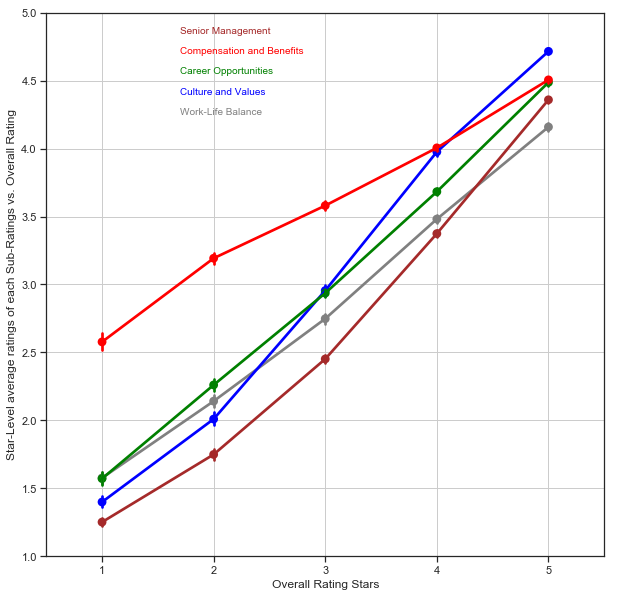

In [9]:
ratings_trend()

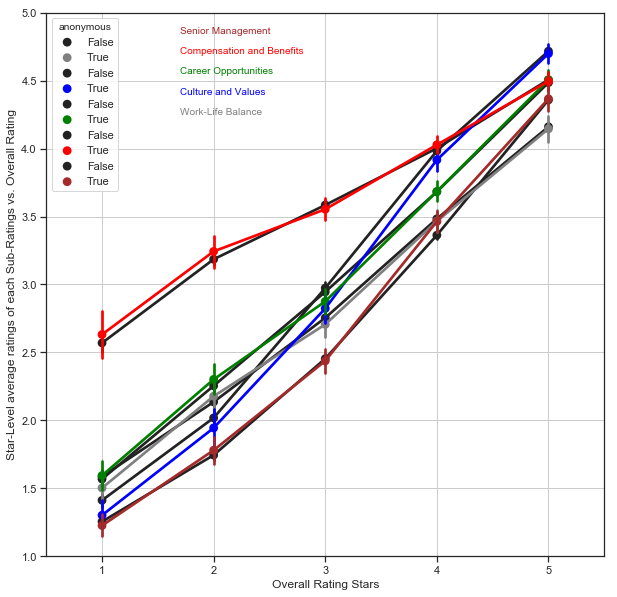

In [10]:
ratings_trend(hue='anonymous')

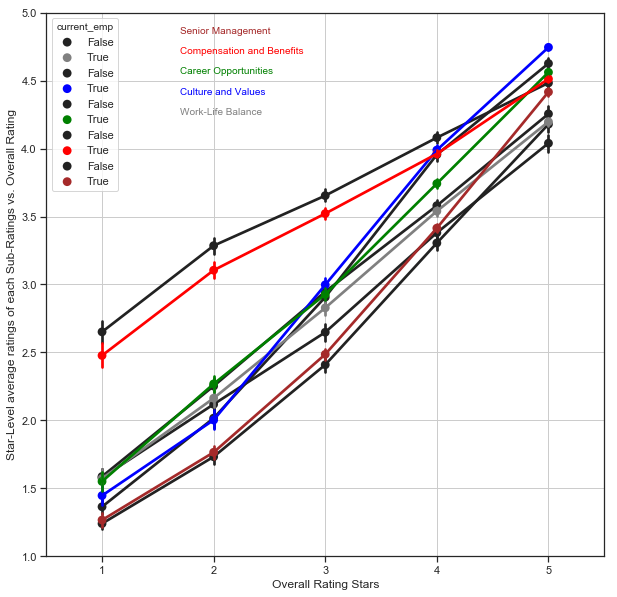

In [11]:
ratings_trend(hue='current_emp')

# Story of our Data

### Here we plotted the mean of each one of the other five-stars rating group against each level of the Overal-Rating. We can see that the lower the Overall-Ratings, the wider of a gap between the Compensations-Benefit. In other words, For employees who were most negative about their workplace experience, money was the least important factor, and as the plot clearly shows below, those employees on average were relatively not troubled with their pay as to the other factors. This finding also holds even when we distinguish anonymous employees and or current or past employees.